# Tests Analysis

This notebooks conducts the univariate test analysis from section 2

In [1]:
# Required libraries
# Required libraries
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
from pathlib import Path
import sys
import os 
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import datetime
import zipfile 
from timeit import default_timer as timer
import sqlalchemy as db
# Paths
sys.path.append(os.path.join(Path(os.getcwd()).parent))  
sys.path.append(os.path.join(os.path.join(Path(os.getcwd()).parent), 'modules'))
data_path = os.path.join(os.path.join(Path(os.getcwd()).parent), 'data')
results_path = os.path.join(os.path.join(Path(os.getcwd()).parent), 'results')
from helper_functions import *
from univariate_tests import *

# create connection to sqlite database
db_path = os.path.join(data_path, 'database.db')
db_engine = db.create_engine('sqlite:///' + db_path)

In [2]:
# import returns & plot returns 
returns = pd.read_sql("select * from returns", db_engine)
returns.set_index('DT', inplace=True)

# Returns Stationarity 

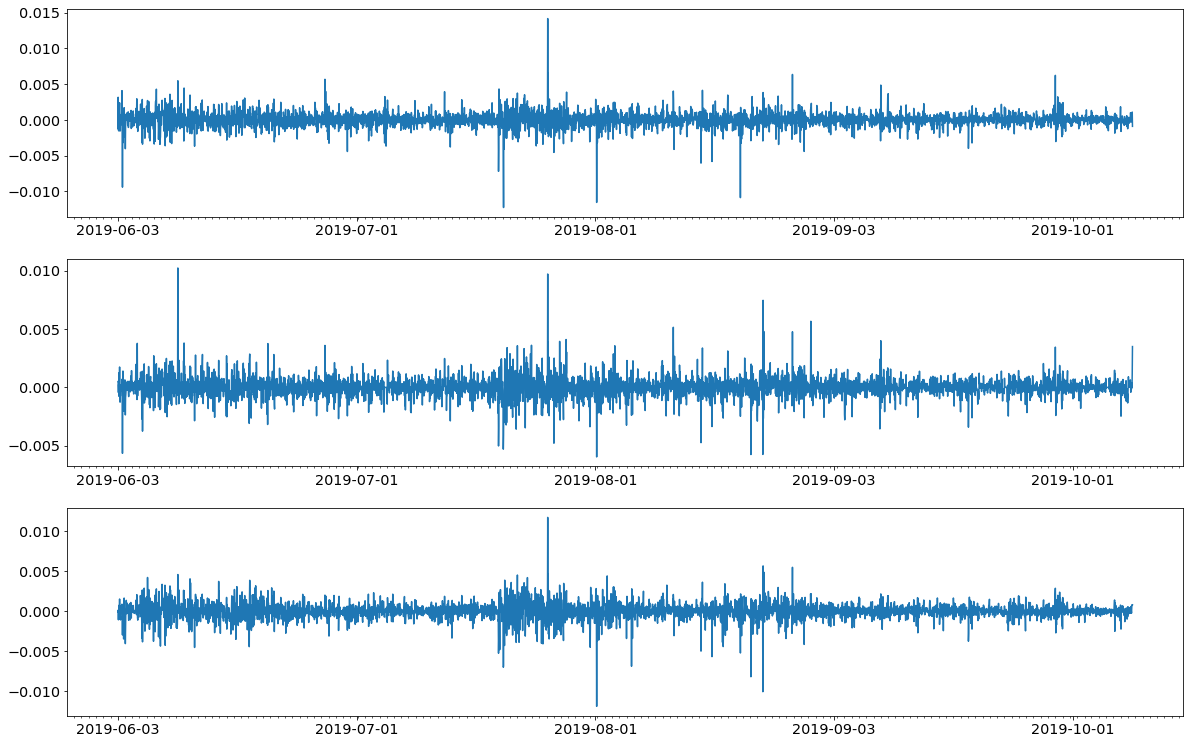

In [3]:
# plot returns timeseries
plot_df(returns, results_path)

In [4]:
# Stationary test
stationarity_test(returns)

,EEM,EZU,SPY
test statistic,-45.825699,-46.091713,-67.065197
pvalue,0.000000,0.000000,0.000000


# Normality

In [5]:
# normality Test
jarque_bera_test(returns)

,EEM,EZU,SPY
jb_value,71574.275813,27111.638085,28203.213155
pvalue,0.000000,0.000000,0.000000
skew,-0.502801,0.536300,-0.632301
ex-kurtosis,20.079166,12.326822,12.556512


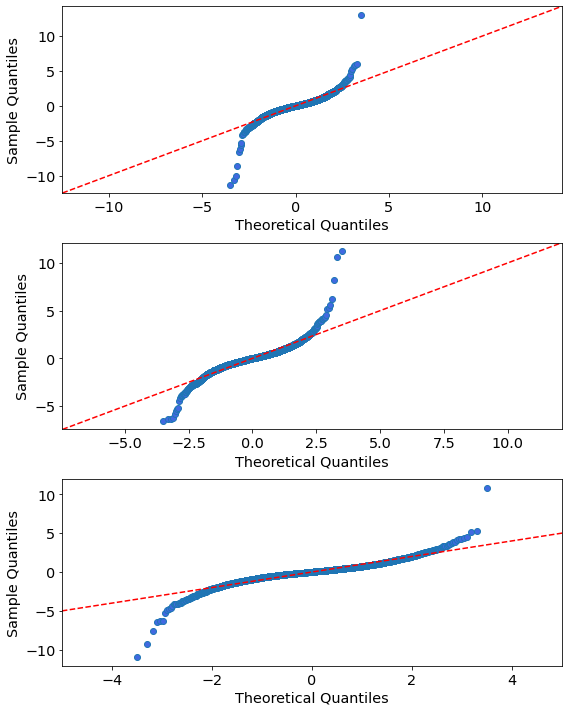

In [6]:
# Q-Q Plot
qq_plot(returns, results_path)

# ARMA Effects

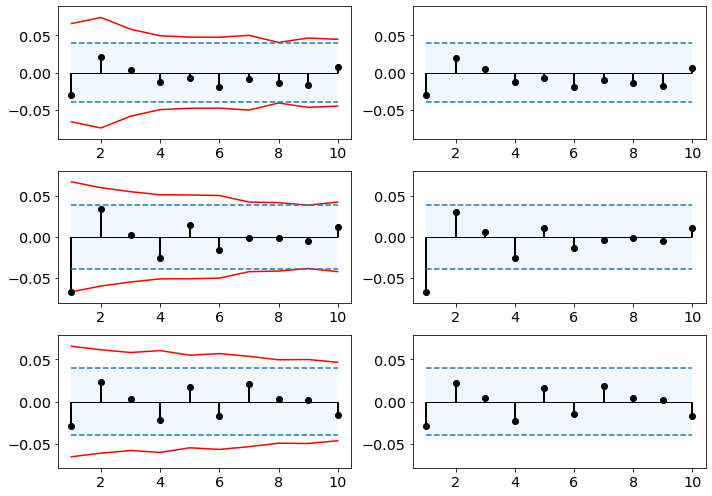

In [7]:
plot_adjusted_acf_pacf(returns, 10, 0.01, results_path,adjusted=True)

In [8]:
adjusted_Box_test(returns,5)

,EEM,EZU,SPY
test statistic,2.565391,9.983218,3.989528
pvalue,0.766616,0.075712,0.550925


# GARCH Effects

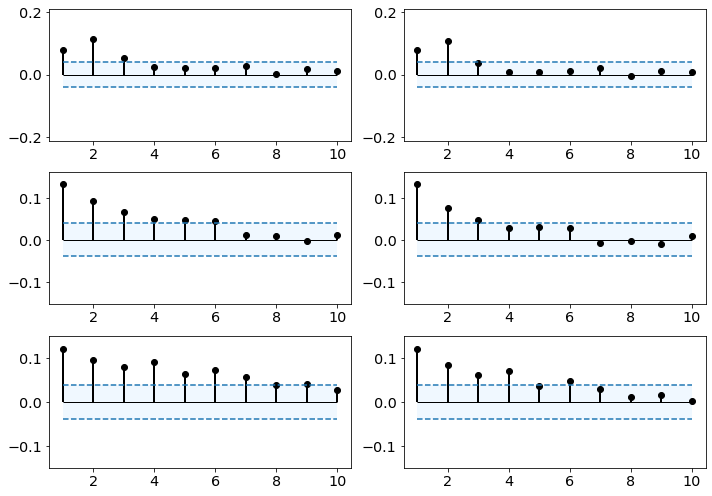

In [9]:
plot_adjusted_acf_pacf(returns.apply(lambda x:x**2), 10, 0.01, results_path,adjusted=False)

In [10]:
LM_test_df(returns, 20)

,EEM,EZU,SPY
test statistic,9.935478e+01,133.238723,165.960122
pvalue,1.643019e-12,0.000000,0.000000


# Long-Menory test

In [11]:
Long_Memory_test(returns)

,EEM,EZU,SPY
test statistic,11.738716,12.476572,16.486911


# Sign Test

In [34]:
 run_asym_tests(returns.EEM.values, 10)

,sign test,neg test,pos test
coeff,1.265000e-07,-0.0002,0.000059
pvalue,4.590000e-01,0.1280,0.649000


In [39]:
 run_asym_tests(returns.EZU.values, 10)

,sign test,neg test,pos test
coeff,-3.042000e-09,-0.0001,0.000045
pvalue,9.750000e-01,0.1860,0.590000


In [40]:
 run_asym_tests(returns.SPY.values, 10)

,sign test,neg test,pos test
coeff,1.126000e-07,-0.0002,0.0002
pvalue,4.130000e-01,0.0210,0.0410
